# Customer Shopping Behavior Analysis

## Table of Contents
- [Project Introduction](#project-introduction)
- [Analysis Outline Questions](#analysis-outline-questions)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-processing Data](#pre-processing-data)
- [Data Analysis](#data-analysis)
    -[1. Identifying our customers](#1.-identifying-ourcustomers)
        -[1.1 Who are our main customer demographic? Where are they from?](#1.1-who-are-our-main-customer-demographic?-Where-are-they-from?)
        -[1.2 Which items are highly rated by our customers? Size? Color?](#1.2-which-items-are-highly-rated-by-our-customers?-size?-color?)
        -[1.3 What is the market sentiment of our products?](#1.3 What is the market sentiment of our products?)
        -[1.4 What are their prefered method of transaction?](#1.4 What are their prefered method of transaction?)
    -[2. Business performance](#2. Business performance)
        -[2.1 Which items do we sell the most?(By profit and by volume)](#2.1 Which items do we sell the most?(By profit and by volume))
        -[2.2 Does subscription status increase sales?](#2.2 Does subscription status increase sales?)
        -[2.3 Is our business market share growing?](#2.3 Is our business market share growing?)
    -[3. Identifying trends within the data](#3. Identifying trends within the data)
        -[3.1 Which season does the company perform best?](#3.1 Which season does the company perform best?)
        -[3.2 What is our customer retention?](#3.2 What is our customer retention?)
        -[3.3 Are there areas within the business for improvement?](#3.3 Are there areas within the business for improvement?)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

<a name="headers"/>

## Project Introduction

The Consumer Behavior and Shopping Habits Dataset contains a variety of intricate insights into customers preferences and behaviors while shopping. We are going to find various methods to

## Analysis Outline Questions

Before looking at the dataset, there are several interesting questions I wanted to learn more about. Below are the insights I am interesting in exploring more into:

    1. Identifying our customers
        1.1 Who are our main customer demographic? Where are they from?
        1.2 Which items are highly rated by our customers? Size? Color?
        1.3 What is the market sentiment of our products?
        1.4 What are their prefered method of transaction?
    
    2. Business performance
        2.1 Which items do we sell the most?(By profit and by volume)
        2.2 Does subscription status increase sales?
        2.3 Is our business market share growing?
    
    3. Identifying trends within the data
        3.1 Which season does the company perform best?
        3.2 What is our customer retention?
        3.3 Are there areas within the business for improvement?




## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('shopping_behavior_updated.csv',
                     sep=',')
except:
    df = pd.read_csv('/datasets/shopping_behavior_updated.csv',
                     sep=',')

## Pre-processing Data

Checking for snake_case format, duplicates, null values, and data usage

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
#checking for snakecase format
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
# Renaming column names to snake_case format
df = df.rename(columns={'Customer ID':'uid',
                        'Age':'age',
                        'Gender':'gender',
                        'Item Purchased':'garment_type',
                        'Category':'category',
                        'Purchase Amount (USD)':'usd_purchase_total',
                        'Location':'location',
                        'Size':'size',
                        'Color':'color',
                        'Season':'season',
                        'Review Rating':'customer_rating',
                        'Subscription Status':'sub_status',
                        'Shipping Type':'shipping_type',
                        'Discount Applied':'discount_applied',
                        'Promo Code Used':'promo_code_applied',
                        'Previous Purchases':'previous_orders',
                        'Payment Method':'payment_method',
                        'Frequency of Purchases':'order_freq'})
df.columns

Index(['uid', 'age', 'gender', 'garment_type', 'category',
       'usd_purchase_total', 'location', 'size', 'color', 'season',
       'customer_rating', 'sub_status', 'shipping_type', 'discount_applied',
       'promo_code_applied', 'previous_orders', 'payment_method',
       'order_freq'],
      dtype='object')

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# Checking for duplicate user IDs
df['uid'].duplicated().sum()

0

In [8]:
# Checking for null values
df.isna().sum()

uid                   0
age                   0
gender                0
garment_type          0
category              0
usd_purchase_total    0
location              0
size                  0
color                 0
season                0
customer_rating       0
sub_status            0
shipping_type         0
discount_applied      0
promo_code_applied    0
previous_orders       0
payment_method        0
order_freq            0
dtype: int64

In [9]:
# Checking column for snake_case format and number of unique outputs
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
# Changing column to snake_case format and changing data type to reduce data usage
df['gender'] = df['gender'].str.lower()
df['gender'] = df['gender'].astype('category')
df['gender'].unique()

['male', 'female']
Categories (2, object): ['female', 'male']

In [11]:
# Checking column for snake_case format and number of unique outputs
df['garment_type'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [12]:
# Changing column to snake_case format
# There are numerous unique values and will leave data type as an object
df['garment_type'] = df['garment_type'].str.lower()
df['garment_type'].unique()

array(['blouse', 'sweater', 'jeans', 'sandals', 'sneakers', 'shirt',
       'shorts', 'coat', 'handbag', 'shoes', 'dress', 'skirt',
       'sunglasses', 'pants', 'jacket', 'hoodie', 'jewelry', 't-shirt',
       'scarf', 'hat', 'socks', 'backpack', 'belt', 'boots', 'gloves'],
      dtype=object)

In [13]:
# Checking column for snake_case format and number of unique outputs
df['category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [14]:
# Changing column to snake_case format and changing data type to reduce data usage
df['category'] = df['category'].str.lower()
df['category'] = df['category'].astype('category')
df['category'].unique()

['clothing', 'footwear', 'outerwear', 'accessories']
Categories (4, object): ['accessories', 'clothing', 'footwear', 'outerwear']

In [15]:
# Checking column for snake_case format and number of unique outputs
df['location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [16]:
# Changing column to snake_case format
# There are numerous unique values and will leave data type as an object
df['location'] = df['location'].str.lower()
df['location'].unique()

array(['kentucky', 'maine', 'massachusetts', 'rhode island', 'oregon',
       'wyoming', 'montana', 'louisiana', 'west virginia', 'missouri',
       'arkansas', 'hawaii', 'delaware', 'new hampshire', 'new york',
       'alabama', 'mississippi', 'north carolina', 'california',
       'oklahoma', 'florida', 'texas', 'nevada', 'kansas', 'colorado',
       'north dakota', 'illinois', 'indiana', 'arizona', 'alaska',
       'tennessee', 'ohio', 'new jersey', 'maryland', 'vermont',
       'new mexico', 'south carolina', 'idaho', 'pennsylvania',
       'connecticut', 'utah', 'virginia', 'georgia', 'nebraska', 'iowa',
       'south dakota', 'minnesota', 'washington', 'wisconsin', 'michigan'],
      dtype=object)

In [17]:
# Checking column for snake_case format and number of unique outputs
df['size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [18]:
# Changing column to snake_case format and changing data type to reduce data usage
df['size'] = df['size'].str.lower()
df['size'] = df['size'].astype('category')
df['size'].unique()

['l', 's', 'm', 'xl']
Categories (4, object): ['l', 'm', 's', 'xl']

In [19]:
# Checking column for snake_case format and number of unique outputs
df['color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [20]:
# Changing column to snake_case format
# To simplify the data analysis and data usage, every unique color will be divided into three
# different color palettes. With less objects results we can convert the data type to reduce data usage 
df['color'] = df['color'].str.lower()
df['color'] = df['color'].astype('category')
df['color'] = df['color'].replace('gray','neutral').replace('maroon','warm').replace('turquoise','cool').replace('white','neutral').replace('charcoal','neutral').replace('silver','cool').replace('pink','warm').replace('purple','cool').replace('olive','cool').replace('gold','warm').replace('violet','cool').replace('teal','cool').replace('lavender','cool').replace('black','neutral').replace('green','cool').replace('peach','warm').replace('red','warm').replace('cyan','cool').replace('brown','warm').replace('beige','warm').replace('orange','warm').replace('indigo','cool').replace('yellow','warm').replace('magenta','cool').replace('blue','cool')
df['color'].unique()

['neutral', 'warm', 'cool']
Categories (3, object): ['neutral', 'warm', 'cool']

In [21]:
# Checking column for snake_case format and number of unique outputs
df['season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [22]:
# Changing column to snake_case format and changing data type to reduce data usage
df['season'] = df['season'].str.lower()
df['season'] = df['season'].astype('category')
df['season'].unique()

['winter', 'spring', 'summer', 'fall']
Categories (4, object): ['fall', 'spring', 'summer', 'winter']

In [23]:
# Checking column for snake_case format and number of unique outputs
df['sub_status'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
# Changing column to snake_case format and changing data type to reduce data usage
df['sub_status'] = df['sub_status'].str.lower()
df['sub_status'] = df['sub_status'].astype('category')
df['sub_status'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [25]:
# Checking column for snake_case format and number of unique outputs
df['shipping_type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [26]:
# Changing column to snake_case format and changing data type to reduce data usage
df['shipping_type'] = df['shipping_type'].str.lower()
df['shipping_type'] = df['shipping_type'].astype('category')
df['shipping_type'].unique()

['express', 'free shipping', 'next day air', 'standard', '2-day shipping', 'store pickup']
Categories (6, object): ['2-day shipping', 'express', 'free shipping', 'next day air', 'standard', 'store pickup']

In [27]:
# Checking column for snake_case format and number of unique outputs
df['discount_applied'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
# Changing column to snake_case format and changing data type to reduce data usage
df['discount_applied'] = df['discount_applied'].str.lower()
df['discount_applied'] = df['discount_applied'].astype('category')
df['discount_applied'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [29]:
# Checking column for snake_case format and number of unique outputs
df['promo_code_applied'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
# Seeing how promo codes and discounts are very similar to each other
# This gives enough reason to check the values to see if they are the same
# If they are we can remove one column to save data usage
df['discount_applied'].value_counts()

discount_applied
no     2223
yes    1677
Name: count, dtype: int64

In [31]:
# Seeing how they have the same results this leads me to believe they are the same column
df['promo_code_applied'].value_counts()

promo_code_applied
No     2223
Yes    1677
Name: count, dtype: int64

In [32]:
# By using random_state sample we can compare the results from both columns 
df['discount_applied'].sample(15, random_state=0)

1951     no
1550    yes
31      yes
3171     no
1044    yes
381     yes
776     yes
2791     no
410     yes
2331     no
842     yes
1586    yes
1945     no
2768     no
1923     no
Name: discount_applied, dtype: category
Categories (2, object): ['no', 'yes']

In [33]:
# This proves that both columns have the same data 
df['promo_code_applied'].sample(15, random_state=0)

1951     No
1550    Yes
31      Yes
3171     No
1044    Yes
381     Yes
776     Yes
2791     No
410     Yes
2331     No
842     Yes
1586    Yes
1945     No
2768     No
1923     No
Name: promo_code_applied, dtype: object

In [34]:
# We can remove this column to save data usage
df = df.drop('promo_code_applied', axis=1)

In [35]:
# Checking column for snake_case format and number of unique outputs
df['payment_method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [36]:
# Changing column to snake_case format and changing data type to reduce data usage
df['payment_method'] = df['payment_method'].str.lower()
df['payment_method'] = df['payment_method'].astype('category')
df['payment_method'].unique()

['venmo', 'cash', 'credit card', 'paypal', 'bank transfer', 'debit card']
Categories (6, object): ['bank transfer', 'cash', 'credit card', 'debit card', 'paypal', 'venmo']

In [37]:
# Checking column for snake_case format and number of unique outputs
df['order_freq'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [38]:
# Changing column to snake_case format and changing data type to reduce data usage
# Replacing lower timeframe results to reduce result redundancy and lower the number of unique results
# to lower data usage when coverting data types
df['order_freq'] = df['order_freq'].str.lower()
df['order_freq'] = df['order_freq'].astype('category')
df['order_freq'] = df['order_freq'].replace('fortnightly','monthly').replace('weekly','monthly').replace('bi-weekly', 'monthly').replace('every 3 months','quarterly')
df['order_freq'].unique()

['monthly', 'annually', 'quarterly']
Categories (3, object): ['annually', 'monthly', 'quarterly']

In [39]:
# By converting data types and reducing result redundancy we cut data usage in half
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   uid                 3900 non-null   int64   
 1   age                 3900 non-null   int64   
 2   gender              3900 non-null   category
 3   garment_type        3900 non-null   object  
 4   category            3900 non-null   category
 5   usd_purchase_total  3900 non-null   int64   
 6   location            3900 non-null   object  
 7   size                3900 non-null   category
 8   color               3900 non-null   category
 9   season              3900 non-null   category
 10  customer_rating     3900 non-null   float64 
 11  sub_status          3900 non-null   category
 12  shipping_type       3900 non-null   category
 13  discount_applied    3900 non-null   category
 14  previous_orders     3900 non-null   int64   
 15  payment_method      3900 non-null   ca

,uid,age,gender,garment_type,category,usd_purchase_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method,order_freq
0,1,55,male,blouse,clothing,53,kentucky,l,neutral,winter,3.1,yes,express,yes,14,venmo,monthly
1,2,19,male,sweater,clothing,64,maine,l,warm,winter,3.1,yes,express,yes,2,cash,monthly
2,3,50,male,jeans,clothing,73,massachusetts,s,warm,spring,3.1,yes,free shipping,yes,23,credit card,monthly
3,4,21,male,sandals,footwear,90,rhode island,m,warm,spring,3.5,yes,next day air,yes,49,paypal,monthly
4,5,45,male,blouse,clothing,49,oregon,m,cool,spring,2.7,yes,free shipping,yes,31,paypal,annually


## Data Analysis

### 1. Identifying our customers

#### 1.1 Who are our main customer demographic? Where are they from?

In [40]:
# Since this is a fashion apparel, the first key demographic characteristic is gender. We
# need to find out if we cater to men, women, or both since products and marketing
# can vary depending on who is our main demographic.
df['gender'].value_counts()

gender
male      2652
female    1248
Name: count, dtype: int64

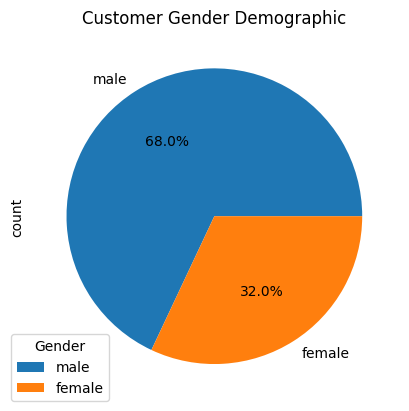

In [103]:
df['gender'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%',
                                 title='Customer Gender Demographic')
plt.legend(title='Gender',
           loc=[-0.05,0])
plt.show()

Based on the dataset our main demographic are men but we also cater to women as well. It would be interesting to see the age demographic of these two customer bases.

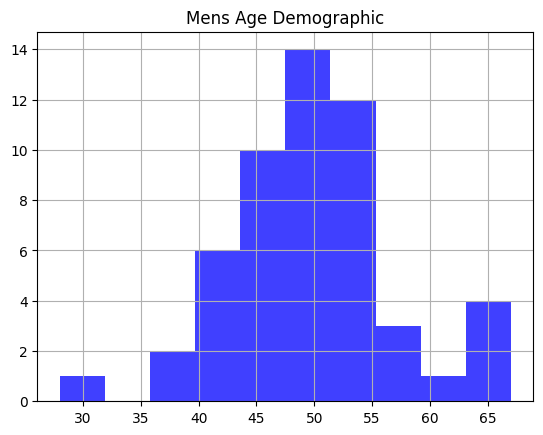

Men's Mean Age: 50.0
Men's Median Age: 50.0


In [42]:
# Seeing how we cater to both genders, we need to find out the age distribution of each customer demographic.
df[df['gender'] == 'male'].groupby('age').agg({'age':'count'}).hist(alpha=0.75,
                                                                    bins='auto',
                                                                    color='blue')
plt.title('Mens Age Demographic')
plt.show()
print('Men\'s Mean Age:', df[df['gender'] == 'male']['age'].value_counts().mean().round(1))
print('Men\'s Median Age:', df[df['gender'] == 'male']['age'].value_counts().median())

Based on the results from the histogram, mean, and median, our main demographic are men in their late 40s to their mid 50s, with the average age being about 50 years old.

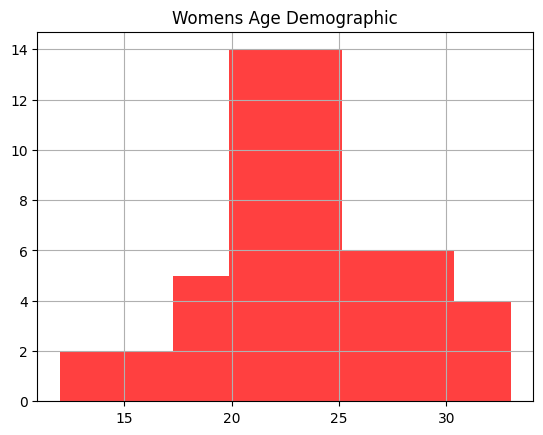

Women's Mean Age: 23.5
Women's Median Age: 23.0


In [43]:
# Now we perform the same analysis filtering for the female customers
df[df['gender'] == 'female'].groupby('age').agg({'age':'count'}).hist(alpha=0.75,
                                                                       bins='auto',
                                                                       color='red')
plt.title('Womens Age Demographic')
plt.show()
print('Women\'s Mean Age:', df[df['gender'] == 'female']['age'].value_counts().mean().round(1))
print('Women\'s Median Age:', df[df['gender'] == 'female']['age'].value_counts().median())

Unlike the older male demographic, our female customers’ ages range from early to mid-20s with the mean and median being about 23. This is an interesting discovery since it is uncommon for two widely different demographics to be interested in the aesthetic of fashion.

In [44]:
# To find where our target demographic order from, we first group the data by location. Then we count all the unique
# customer IDs from each unique location, sort from largest to smallest, and get the top 10 states with the largest
# concentration of our customer demographic.
df.groupby('location')['uid'].count().sort_values(ascending=False).head(5)

location
montana       96
california    95
idaho         93
illinois      92
alabama       89
Name: uid, dtype: int64

This grouping tells us that Montana, California, Idaho, Illinois, and Alabama are generally where the largest clusters of our customer demographic are from. 

In [45]:
# It is also important to find which states has the largest demographic of male and female populations are
# from so we have the option to perform more targeted marketing since our male and female customers
# are widely different in age and cultural preferences.
df[df['gender'] == 'male'].groupby('location')['uid'].count().sort_values(ascending=False).head(5)

location
california    66
missouri      63
alabama       62
vermont       62
new york      62
Name: uid, dtype: int64

Grouping only the male customers shows that the top five states for male customers have changed to California, Missouri, Alabama, Vermont, and New York. Only California and Alabama were on the top five list before and now they have risen in ranking. This also tells us that our male and female demographic preferences differ widely from state to state indicating that a targeted marketing effort could perform better than just a general marketing effort.

In [46]:
df[df['gender'] == 'female'].groupby('location')['uid'].count().sort_values(ascending=False).head(5)

location
montana    38
idaho      34
texas      33
georgia    30
kansas     30
Name: uid, dtype: int64

The top five states where our main female customer demographic reside in include Montana, Idaho, Texas, Georgia, and Kansas. This includes Montana and Idaho from the general top 5 with three other states. It would be interesting to see who the last five states are regarding our customers.

In [47]:
df[df['gender'] == 'male'].groupby('location')['uid'].count().sort_values(ascending=False).tail(5)

location
utah            44
new jersey      43
arizona         40
rhode island    40
kansas          33
Name: uid, dtype: int64

According to this data, it says that the five lowest-performing states for our male customers are Utah, New Jersey, Arizona, Rhode Island, and Kansas. This is interesting to see that Kansas was a top five performing state with our female customers and is also the last and worst performing state for our male customers. This is a prime example of the different preferences of our older male customers and younger female customers. However, this could also be an opportunity to perform a targeted marketing campaign for men in this state to see if the success with our female demographic can be recreated with our male customers. 

In [48]:
df[df['gender'] == 'female'].groupby('location')['uid'].count().sort_values(ascending=False).tail(5)

location
missouri         18
indiana          17
iowa             17
massachusetts    16
hawaii           14
Name: uid, dtype: int64

The last five performing states for our female demographic are Missouri, Indiana, Iowa, Massachusetts, and Hawaii. Again, we can see the contrast in customer preferences seeing as Missouri is a top-five performing state for our male audience and is also in the bottom five for our female audience.  

In [49]:
df.groupby('location')['usd_purchase_total'].sum().sort_values(ascending=False).head(5)

location
montana       5784
illinois      5617
california    5605
idaho         5587
nevada        5514
Name: usd_purchase_total, dtype: int64

In [50]:
df.groupby('location')['usd_purchase_total'].sum().sort_values(ascending=False).tail(5)

location
rhode island    3871
new jersey      3802
florida         3798
hawaii          3752
kansas          3437
Name: usd_purchase_total, dtype: int64

In [51]:
df.groupby('season')['usd_purchase_total'].sum().sort_values(ascending=False)

season
fall      60018
spring    58679
winter    58607
summer    55777
Name: usd_purchase_total, dtype: int64

In [52]:
df['garment_type'].value_counts()

garment_type
blouse        171
jewelry       171
pants         171
shirt         169
dress         166
sweater       164
jacket        163
belt          161
sunglasses    161
coat          161
sandals       160
socks         159
skirt         158
shorts        157
scarf         157
hat           154
handbag       153
hoodie        151
shoes         150
t-shirt       147
sneakers      145
boots         144
backpack      143
gloves        140
jeans         124
Name: count, dtype: int64

In [53]:
df[df['gender'] == 'male']['garment_type'].value_counts()

garment_type
pants         123
jewelry       119
coat          114
dress         114
sweater       114
scarf         112
shirt         110
shorts        109
jacket        109
skirt         109
belt          106
backpack      106
blouse        105
sunglasses    105
sneakers      103
gloves        103
shoes         102
hat           102
t-shirt       101
socks         101
sandals       101
hoodie        100
handbag        95
jeans          95
boots          94
Name: count, dtype: int64

In [54]:
df[df['gender'] == 'male'].groupby(['garment_type'])['customer_rating'].mean().sort_values(ascending=False)

garment_type
gloves        3.892233
belt          3.844340
sandals       3.843564
hat           3.837255
boots         3.827660
t-shirt       3.825743
jewelry       3.803361
backpack      3.789623
sweater       3.771930
jacket        3.770642
skirt         3.766972
pants         3.759350
dress         3.756140
socks         3.749505
coat          3.738596
sneakers      3.725243
shirt         3.709091
shoes         3.708824
scarf         3.704464
blouse        3.698095
shorts        3.687156
sunglasses    3.682857
jeans         3.664211
hoodie        3.648000
handbag       3.633684
Name: customer_rating, dtype: float64

In [55]:
df[df['gender'] == 'female']['garment_type'].value_counts()

garment_type
blouse        66
sandals       59
shirt         59
socks         58
handbag       58
sunglasses    56
belt          55
jacket        54
dress         52
jewelry       52
hat           52
hoodie        51
boots         50
sweater       50
skirt         49
shoes         48
shorts        48
pants         48
coat          47
t-shirt       46
scarf         45
sneakers      42
backpack      37
gloves        37
jeans         29
Name: count, dtype: int64

In [56]:
df[df['gender'] == 'female'].groupby(['garment_type'])['customer_rating'].mean().sort_values(ascending=False)

garment_type
handbag       4.006897
sunglasses    3.860714
hoodie        3.858824
sneakers      3.838095
sandals       3.837288
shoes         3.829167
skirt         3.816327
gloves        3.786486
boots         3.784000
shorts        3.766667
sweater       3.756000
socks         3.753448
dress         3.751923
jacket        3.748148
hat           3.746154
coat          3.710638
t-shirt       3.689130
scarf         3.688889
blouse        3.660606
jewelry       3.648077
backpack      3.645946
pants         3.614583
belt          3.601818
jeans         3.596552
shirt         3.481356
Name: customer_rating, dtype: float64

#### 1.2 Which items are highly rated by our customers? Size? Color?

In [121]:
print(df['customer_rating'].min())
print(df['customer_rating'].mean().round(3))
print(df['customer_rating'].max())

2.5
3.75
5.0


Based on the minimum value 2.5/5 rating, a maximum value of 5/5 rating, and an average value of 3.7/5 rating for the overall business. This signals to the business that the sold products were seen as average at worst, and perfect at best which is a good sign of quality products.

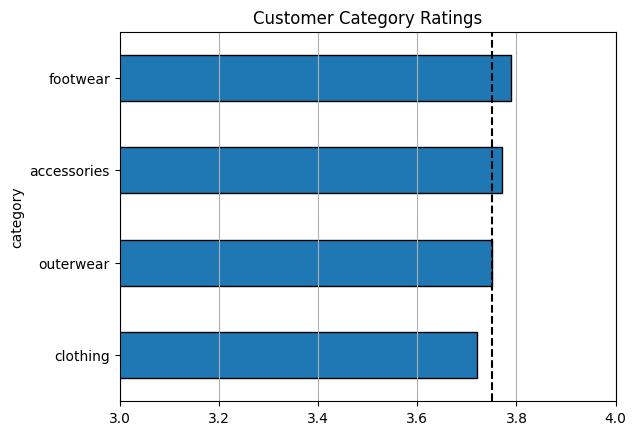

In [125]:
avg_rating = df['customer_rating'].mean()

df.groupby(['category'])['customer_rating'].mean().sort_values().round(2).plot(kind='barh',
                                                                               title='Customer Category Ratings',
                                                                               edgecolor='black')
plt.axvline(x=avg_rating, color='black', linestyle='--')
plt.grid(axis='x')
plt.xlim([3,4])
plt.show()

Grouping each category by their average rating shows us that our footwear had the highest rating by category and clothing had the lowest rating by category. 

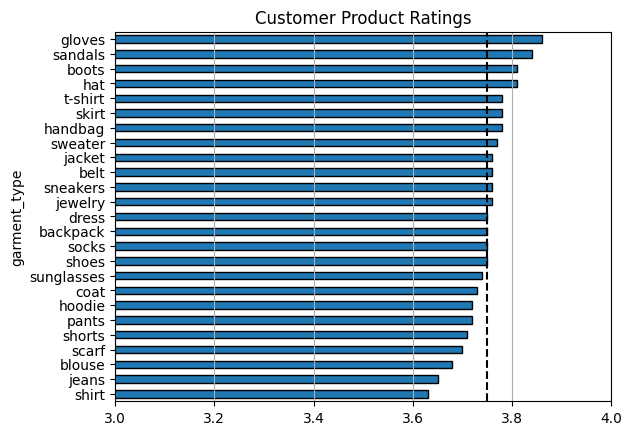

In [127]:
df.groupby(['garment_type'])['customer_rating'].mean().sort_values().round(2).plot(kind='barh',
                                                                                   title='Customer Product Ratings',
                                                                                   edgecolor='black')
plt.axvline(x=avg_rating, color='black', linestyle='--')
plt.grid(axis='x')
plt.xlim([3,4])
plt.show()

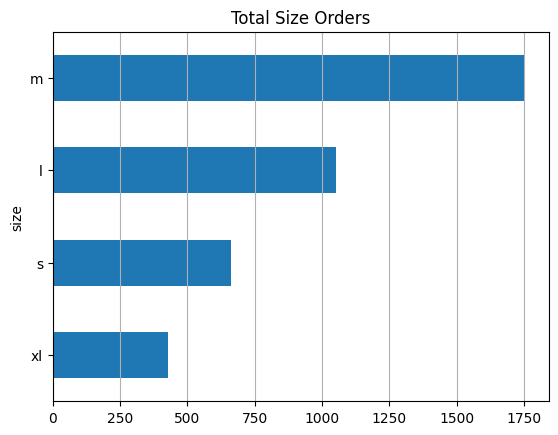

In [97]:
df['size'].value_counts().sort_values().plot(kind='barh',
                                             title='Total Size Orders')
plt.grid(axis='x')
plt.show()

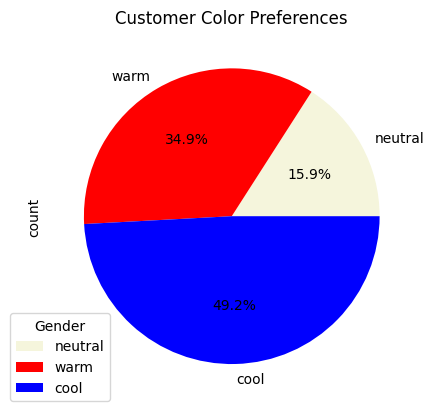

In [95]:
df['color'].value_counts().sort_values().plot(kind='pie',
                                              title='Customer Color Preferences',
                                              autopct='%1.1f%%',
                                              colors=['beige','red','blue'])
plt.legend(title='Gender',
           loc=[-0.1,0])
plt.show()

## Conclusions and Reccomendations

## Dataset Citation

Zee solver. (2023, October). Consumer Behavior and Shopping Habits Dataset, Version 1. Retrieved December 14, 2023 from [Kaggle](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data).